In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

In [2]:
# Import data
df = pd.read_csv('investor_data.csv')
df.head()

,risk,clientID,dateID,avgMonthlyIncome,education,expSavings,expTransport,expGroceries,expLeisure,expShopping,expUtilities,expOther,cardLevel,amountDeposit,amountLoan,avgTransaction,avgNumTransactions,largestSingleTransaction
0,0.592,user-0000000000000000,2021-11-01,272817.5,NaN,0.20,0.09,0.12,0.16,0.14,0.14,0.14,2,0.0,0.0,1454.8,185.5,49832.0
1,0.485,user-0000000000000001,2021-11-01,162850.8,college,0.16,0.15,0.11,0.14,0.14,0.12,0.17,0,0.0,100000.0,3005.4,173.9,49025.8
2,0.300,user-0000000000000002,2021-11-01,640200.6,college,0.18,0.08,0.09,0.13,0.23,0.10,0.19,1,50000.0,0.0,39649.6,556.2,19337.5
3,0.664,user-0000000000000003,2021-11-01,29308.5,BSc,0.12,0.13,0.07,0.18,0.26,0.15,0.08,2,0.0,0.0,22542.6,351.6,4724.4
4,0.643,user-0000000000000004,2021-11-01,420154.1,NaN,0.09,0.14,0.21,0.12,0.11,0.11,0.22,2,0.0,0.0,2744.4,310.5,5445.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   risk                      72000 non-null  float64
 1   clientID                  72000 non-null  object 
 2   dateID                    72000 non-null  object 
 3   avgMonthlyIncome          72000 non-null  float64
 4   education                 50400 non-null  object 
 5   expSavings                72000 non-null  float64
 6   expTransport              72000 non-null  float64
 7   expGroceries              72000 non-null  float64
 8   expLeisure                72000 non-null  float64
 9   expShopping               72000 non-null  float64
 10  expUtilities              72000 non-null  float64
 11  expOther                  72000 non-null  float64
 12  cardLevel                 72000 non-null  int64  
 13  amountDeposit             72000 non-null  float64
 14  amount

In [4]:
# Check for missing values
print(df.isnull().sum())

risk                            0
clientID                        0
dateID                          0
avgMonthlyIncome                0
education                   21600
expSavings                      0
expTransport                    0
expGroceries                    0
expLeisure                      0
expShopping                     0
expUtilities                    0
expOther                        0
cardLevel                       0
amountDeposit                   0
amountLoan                      0
avgTransaction                  0
avgNumTransactions              0
largestSingleTransaction        0
dtype: int64


In [5]:
# Drop missing values
df.dropna(inplace = True)
print(df.isnull().sum())

risk                        0
clientID                    0
dateID                      0
avgMonthlyIncome            0
education                   0
expSavings                  0
expTransport                0
expGroceries                0
expLeisure                  0
expShopping                 0
expUtilities                0
expOther                    0
cardLevel                   0
amountDeposit               0
amountLoan                  0
avgTransaction              0
avgNumTransactions          0
largestSingleTransaction    0
dtype: int64


In [6]:
# Check duplicates
df.duplicated().sum()

0

In [7]:
# Change 'dateID' object to float
df['dateID'] = pd.to_datetime(df['dateID'], format = '%Y-%m-%d')
df['Day'] = df['dateID'].dt.day
df['Month'] = df['dateID'].dt.month
df['Year'] = df['dateID'].dt.year
df.drop(columns = ['dateID'], inplace = True)

In [8]:
# Get dummy values for categorical predictor 'education'
df = pd.get_dummies(df, prefix = ['education'], columns = ['education'])

In [9]:
# Convert the risk preference data to risk aversion data (= 10 - risk preference * 10) for further optimization 
df["risk"] = 10 - (df["risk"] * 10)

df.head()

,risk,clientID,avgMonthlyIncome,expSavings,expTransport,expGroceries,expLeisure,expShopping,expUtilities,expOther,...,avgTransaction,avgNumTransactions,largestSingleTransaction,Day,Month,Year,education_BSc,education_MSc,education_PhD,education_college
1,5.15,user-0000000000000001,162850.8,0.16,0.15,0.11,0.14,0.14,0.12,0.17,...,3005.4,173.9,49025.8,1,11,2021,0,0,0,1
2,7.00,user-0000000000000002,640200.6,0.18,0.08,0.09,0.13,0.23,0.10,0.19,...,39649.6,556.2,19337.5,1,11,2021,0,0,0,1
3,3.36,user-0000000000000003,29308.5,0.12,0.13,0.07,0.18,0.26,0.15,0.08,...,22542.6,351.6,4724.4,1,11,2021,1,0,0,0
8,3.23,user-0000000000000008,419443.6,0.07,0.09,0.24,0.16,0.19,0.14,0.11,...,24736.7,821.7,4304.1,1,11,2021,1,0,0,0
10,4.83,user-0000000000000010,314346.8,0.10,0.15,0.16,0.16,0.18,0.16,0.08,...,4191.7,132.7,120294.7,1,11,2021,0,0,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50400 entries, 1 to 71999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   risk                      50400 non-null  float64
 1   clientID                  50400 non-null  object 
 2   avgMonthlyIncome          50400 non-null  float64
 3   expSavings                50400 non-null  float64
 4   expTransport              50400 non-null  float64
 5   expGroceries              50400 non-null  float64
 6   expLeisure                50400 non-null  float64
 7   expShopping               50400 non-null  float64
 8   expUtilities              50400 non-null  float64
 9   expOther                  50400 non-null  float64
 10  cardLevel                 50400 non-null  int64  
 11  amountDeposit             50400 non-null  float64
 12  amountLoan                50400 non-null  float64
 13  avgTransaction            50400 non-null  float64
 14  avgNum

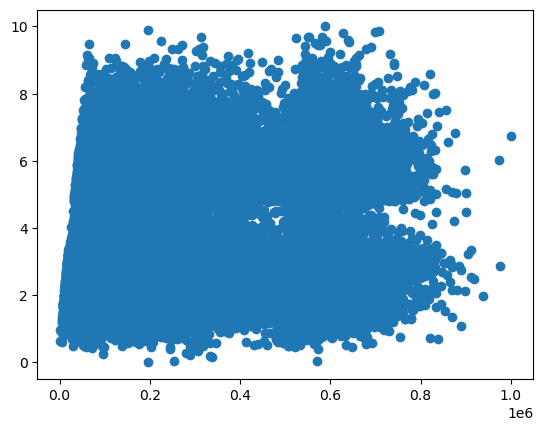

In [11]:
# Plot the relationship between the response variable 'risk' and predictors to see if they may be linearly related
plt.scatter(df['avgMonthlyIncome'], y = df['risk'])

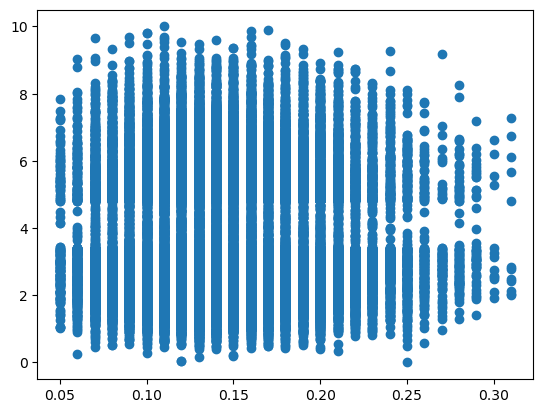

In [12]:
plt.scatter(df['expSavings'], y = df['risk'])

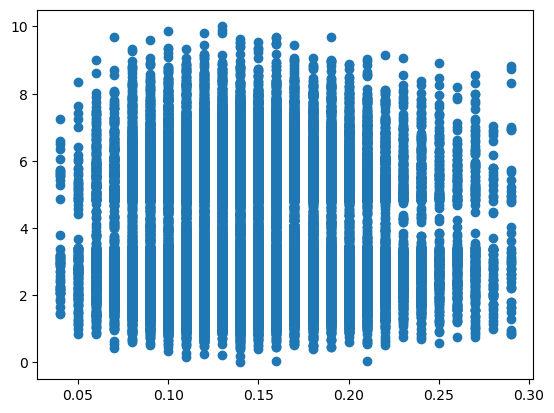

In [13]:
plt.scatter(df['expTransport'], y = df['risk'])

It's unlikely that linear regression will be a good model from these graphs. However, let's first try linear regression model to see how it fits the data.

In [14]:
# Drop column 'clientID' since it's not related with risk prediction
df_clean = df.drop(columns = ['clientID'])

In [15]:
# Split train and test sets
from sklearn.model_selection import train_test_split
x = df_clean.drop(['risk'], axis = 1)
y = df_clean['risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40320, 21), (10080, 21), (40320,), (10080,))

# Linear Regression Model

In [16]:
train = pd.concat([x_train, y_train], axis = 1)

In [17]:
test = pd.concat([x_test, y_test], axis = 1)

In [18]:
# Linear regression model
import statsmodels.formula.api as smf
LR_model = smf.ols(formula = 'risk ~' + '+'.join(train.columns.difference(['risk'])), data = train).fit()

In [19]:
from sklearn.metrics import r2_score

preds_LR = LR_model.predict(x_train)
print(f'R2 of linreg-model: {r2_score(y_train, preds_LR)}')
preds_LR = LR_model.predict(x_test)
print(f'R2 of linreg-model OOS: {r2_score(y_test, preds_LR)}')

R2 of linreg-model: 0.7321745396554018
R2 of linreg-model OOS: 0.7259103901006394


In [20]:
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   risk   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     5798.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:01:30   Log-Likelihood:                -51244.
No. Observations:               40320   AIC:                         1.025e+05
Df Residuals:                   40300   BIC:                         1.027e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8209      2.272     -0.361      0.718      -5.274       3.633
Day                         -0.8209      2.272     -0.361      0.718      -5.274       3.633
Month                       -0.0001      0.001     -0.104      0.917      -0.003       0.002
Year                         0.0026      0.003      1.017      0.309      -0.002       0.007
amountDeposit             6.312e-08   4.65e-08      1.357      0.175   -2.81e-08    1.54e-07
amountLoan                2.287e-06   6.54e-08     34.965      0.000    2.16e-06    2.41e-06
avgMonthlyIncome          1.317e-07   2.08e-08      6.345      0.000     9.1e-08    1.72e-07
avgNumTransactions          -0.0001   1.44e-05     -7.141      0.000      -0.000   -7.48e-05
avgTransaction           -1.143e-06   2.73e-07     -4.186      0.000   -1.68e-06   -6.08e-07
cardLevel                   -0.2092      0.005    -46.321      0.000      -0.218      -0.200
education_BSc               -0.4418      0.568     -0.778      0.437      -1.555       0.672
education_MSc               -1.1113      0.568     -1.956      0.050      -2.225       0.002
education_PhD               -1.2619      0.568     -2.221      0.026      -2.375      -0.148
education_college            1.9941      0.568      3.510      0.000       0.880       3.108
expGroceries                 0.3126      0.584      0.535      0.592      -0.832       1.457
expLeisure                   0.2963      0.581      0.510      0.610      -0.842       1.434
expOther                     0.2133      0.585      0.365      0.715      -0.932       1.359
expSavings                   0.3737      0.586      0.638      0.524      -0.774       1.522
expShopping                  0.1856      0.583      0.318      0.750      -0.957       1.328
expTransport                 0.3579      0.581      0.616      0.538      -0.781       1.496
expUtilities                 0.1998      0.583      0.342      0.732      -0.944       1.343
largestSingleTransaction  3.146e-07   6.16e-08      5.107      0.000    1.94e-07    4.35e-07
==============================================================================
Omnibus:                     8443.516   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            75517.760
Skew:                           0.756   Prob(JB):                         0.00
Kurtosis:                       9.532   Cond. No.                     4.15e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.65e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

We can observe from the p-value that variables 'amountLoan', 'avgMonthlyIncome', 'avgNumTransactions', 'avgTransaction', 'cardLevel', 'education_BSc', 'education_MSc', 'education_PhD', 'largestSingleTransaction' can be concluded as significant variables. 

# Regression Tree Model

In [21]:
# Regression tree model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Range for the complexity parameter value
grid_values = {'ccp_alpha': np.linspace(0, 0.001, 51)}

# The decision tree regressor
dtr = DecisionTreeRegressor(min_samples_leaf = 5, min_samples_split = 10, random_state = 10)

# To find the optimal complexity parameter value using 5-fold cross validation
dtr_cv = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2', cv = 5 , verbose = 0)
dtr_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=10,
                                             random_state=10),
             param_grid={'ccp_alpha': array([0.0e+00, 2.0e-05, 4.0e-05, 6.0e-05, 8.0e-05, 1.0e-04, 1.2e-04,
       1.4e-04, 1.6e-04, 1.8e-04, 2.0e-04, 2.2e-04, 2.4e-04, 2.6e-04,
       2.8e-04, 3.0e-04, 3.2e-04, 3.4e-04, 3.6e-04, 3.8e-04, 4.0e-04,
       4.2e-04, 4.4e-04, 4.6e-04, 4.8e-04, 5.0e-04, 5.2e-04, 5.4e-04,
       5.6e-04, 5.8e-04, 6.0e-04, 6.2e-04, 6.4e-04, 6.6e-04, 6.8e-04,
       7.0e-04, 7.2e-04, 7.4e-04, 7.6e-04, 7.8e-04, 8.0e-04, 8.2e-04,
       8.4e-04, 8.6e-04, 8.8e-04, 9.0e-04, 9.2e-04, 9.4e-04, 9.6e-04,
       9.8e-04, 1.0e-03])},
             scoring='r2')

In [22]:
# Print the optimal complexity parameter value for our model
print('Best ccp_alpha', dtr_cv.best_params_) 

Best ccp_alpha {'ccp_alpha': 0.00062}


In [23]:
# Regression tree model with the optimal ccp alpha value
dtr_final = DecisionTreeRegressor(min_samples_leaf = 5, 
                                  min_samples_split = 20, 
                                  ccp_alpha = 0.00062,
                                  random_state = 10)
dtr_final.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.00062, min_samples_leaf=5,
                      min_samples_split=20, random_state=10)

In [24]:
# Random forest model
from sklearn.ensemble import RandomForestRegressor

# Range for the max_features
grid_values = {'max_features': np.linspace(1,18,9, dtype = 'int32')} 

# Random forest model
rf = RandomForestRegressor(min_samples_leaf = 5, n_estimators = 500, random_state = 10) 

# Choosing the max features by a 5-fold cross validation
rf_cv = GridSearchCV(rf, param_grid = grid_values, scoring = 'r2', cv = 5)
rf_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(min_samples_leaf=5,
                                             n_estimators=500,
                                             random_state=10),
             param_grid={'max_features': array([ 1,  3,  5,  7,  9, 11, 13, 15, 18])},
             scoring='r2')

In [25]:
print(rf_cv.best_params_)

{'max_features': 15}


In [26]:
# Random forest model with the optimal max_features value
rf_final = RandomForestRegressor(min_samples_leaf = 5, 
                                 n_estimators = 500, 
                                 max_features = 15,
                                 random_state = 10) 
rf_final.fit(x_train, y_train)

RandomForestRegressor(max_features=15, min_samples_leaf=5, n_estimators=500,
                      random_state=10)

In [27]:
# Define a function to compute the out-of-sample R-squared of a model using the test set
def OSR2(model, df_train, df_test, dependent_var):   
    
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    
    return 1 - SSE/SST

# Evaluation

In [28]:
pd.DataFrame({'OSR2 Score':[OSR2(LR_model, train, test, 'risk'), 
                          round(r2_score(y_test, dtr_final.predict(x_test)), 5),
                          round(r2_score(y_test, rf_final.predict(x_test)), 5)
                          ],
            },
             index=['Linear Regression', "Regression Tree", "Random Forest"])

,OSR2 Score
Linear Regression,0.725935
Regression Tree,0.915090
Random Forest,0.930300


Based on $OSR^2$ values, random forest model performs the best.

# Download Data for Further Optimization Analysis

In [29]:
# Download risk aversion data from best model for further optimization analysis
# Predicted risk aversion data
risk_data = dtr_final.predict(x)

# Add client ID 
ID = df['clientID']
df_risk = pd.DataFrame(ID)

# Add risk aversion data to each client
df_risk['RiskAversion'] = risk_data.tolist()

In [30]:
# Data Download
pd.DataFrame(df_risk).to_csv('Risk_Aversion_Data.csv', index = False)  

In [31]:
# Classification for risk aversion data
Aggressive = df_risk[(df_risk['RiskAversion'] >= 0) & (df_risk['RiskAversion'] < 3.33)]
Moderate = df_risk[(df_risk['RiskAversion'] >= 3.33) & (df_risk['RiskAversion'] < 6.67)]
Conservative = df_risk[(df_risk['RiskAversion'] >= 6.67) & (df_risk['RiskAversion'] <= 10)]

In [32]:
# Classification Data Download
pd.DataFrame(Aggressive).to_csv('Risk_Aversion_Aggressive.csv', index = False) 
pd.DataFrame(Moderate).to_csv('Risk_Aversion_Moderate.csv', index = False) 
pd.DataFrame(Conservative).to_csv('Risk_Aversion_Conservative.csv', index = False) 